Python Workshop 5
=========

July 19, 2017


# Aggregation

In this workshop we're going to investigate some **pandas** features
related to aggregating data based on grouping.  We'll use a dataset
that comes with most R distributions called `ChickWeight`.  If you
cloned this repository or manually downloaded its artifacts, you
should have a file in your current directory named `ChickWeight.csv`.
Let's read this in.

In [1]:
import numpy as np
import pandas as pd

cw = pd.read_csv('ChickWeight.csv')
cw.head(15)

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
5,93,10,1,1
6,106,12,1,1
7,125,14,1,1
8,149,16,1,1
9,171,18,1,1


The data tracks the weights of baby chickens in four groups based
their diets.  The diets are just referred to as `1`, `2`, `3`, and
`4`.  The chicks are numbered as well.

Let's create a grouping of the chick weights based on `Time` of the
weight and the `Diet`.  What we **won't** include is the identifier
of the `Chick`.  Each `Time + Diet` group will contain weights for
all chicks.

In [2]:
chickgrp = cw['weight'].groupby([cw.Time, cw.Diet])
type(chickgrp)

pandas.core.groupby.SeriesGroupBy

Let's break this down.

1. `cw` is a dataframe with an index and four columns.
2. `cw['weight']` is a Series with the same index as the `cw` dataframe.
3. `cw['weight'].groupby([cw.Time, cw.Diet])` is a `SeriesGroupBy` object.

The `chickgrp` object is the basis for aggregations we might like to perform.
We can average them, sum them, extract their min/max and many other things.

In [3]:
avgchick = chickgrp.mean()
maxchick = chickgrp.max()
minchick = chickgrp.min()
allchick = chickgrp.sum()
avgchick.head(15)

Time  Diet
0     1       41.400000
      2       40.700000
      3       40.800000
      4       41.000000
2     1       47.250000
      2       49.400000
      3       50.400000
      4       51.800000
4     1       56.473684
      2       59.800000
      3       62.200000
      4       64.500000
6     1       66.789474
      2       75.400000
      3       77.900000
Name: weight, dtype: float64

The `chickgrp` object is meant to be reused across many aggegrations.
But if you only need it once, you usually issue the **combine** action
in the same step.

In [4]:
avgchick = cw['weight'].groupby([cw.Time, cw.Diet]).mean()

# Stack and Unstack: Pivot Tables

Take another look at the first 15 rows of the `avgchick` dataset.
It's easy to compare the weights of two diets at the same point in time
since the diet measurements are next to each other.  But comparing
the same diet over time causes our eyes to have to skip over rows.
Pandas refers to this as a *stacked dataframe*.  We can *unstack*
it (or pivot on the `Diet` column).

In [5]:
widechick = avgchick.unstack()
widechick

Diet,1,2,3,4
Time,,,,
0,41.400000,40.7,40.8,41.000000
2,47.250000,49.4,50.4,51.800000
4,56.473684,59.8,62.2,64.500000
6,66.789474,75.4,77.9,83.900000
8,79.684211,91.7,98.4,105.600000
10,93.052632,108.5,117.1,126.000000
12,108.526316,131.3,144.4,151.400000
14,123.388889,141.9,164.5,161.800000
16,144.647059,164.7,197.4,182.000000


You can see that the `Diet` portion of the hierarchical index was
unstacked (pivoted) into a column for each value.  How did it know
we wanted to pivot `Diet` instead of `Time`?  By default, the
`unstack` method pivots the inner-most component of a heirarchical
index.

The column names of `1`, `2`, `3`, and `4` almost seem numeric
even though they are intended to be categorical.  Let's change
the column names to make this explicit.

In [6]:
widechick.columns = ['diet1', 'diet2', 'diet3', 'diet4']
widechick

,diet1,diet2,diet3,diet4
Time,,,,
0,41.400000,40.7,40.8,41.000000
2,47.250000,49.4,50.4,51.800000
4,56.473684,59.8,62.2,64.500000
6,66.789474,75.4,77.9,83.900000
8,79.684211,91.7,98.4,105.600000
10,93.052632,108.5,117.1,126.000000
12,108.526316,131.3,144.4,151.400000
14,123.388889,141.9,164.5,161.800000
16,144.647059,164.7,197.4,182.000000


We should be able to plot these easily.

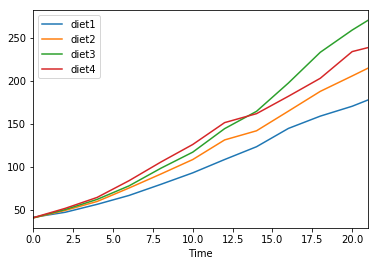

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
widechick.plot()

This is not a bad plot considering we got it for free
(didn't provide any customization parameters).  But
we can provide additional parameters to get other
effects.  Let's see what we can get if we do decide
to set some parameters.

In the figure below, I appealed to the `plot` method API at

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot

and chose the

* `subplots`
* `sharex`

parameters to override.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b03ae10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b14d9e8>], dtype=object)

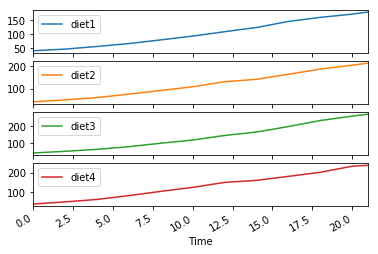

In [28]:
plt.figure()
widechick.plot(subplots=True, sharex=True)

OK.  Maybe that didn't look so good.  In the next one,
I choose

* `title`
* `grid`

I also use the Matplotlib `Axes` object that is returned
from the `plot` invocation.  The Matplotlib documentation
has a list of all kinds of things one can do with an `Axes`
object here.

http://matplotlib.org/api/axes_api.html

I settle for labeling the Y-axis.

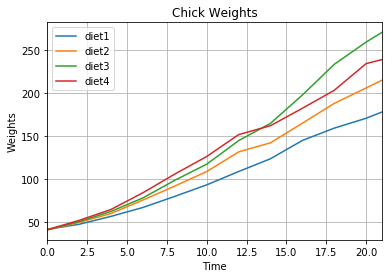

In [35]:
plt.figure()
ax = widechick.plot(title="Chick Weights", grid=True)
ax.set_ylabel("Weights")

There are many buttons and knobs for customizing your figure.
But let's get back to stracking and unstacking.

The reverse of `unstack` is `stack`.  This creates a **long**
dataframe from a **wide** dataframe.

In [7]:
longchick = widechick.stack()
longchick.head(15)

Time       
0     diet1    41.400000
      diet2    40.700000
      diet3    40.800000
      diet4    41.000000
2     diet1    47.250000
      diet2    49.400000
      diet3    50.400000
      diet4    51.800000
4     diet1    56.473684
      diet2    59.800000
      diet3    62.200000
      diet4    64.500000
6     diet1    66.789474
      diet2    75.400000
      diet3    77.900000
dtype: float64

We have our original dataframe back with the inner component
of the hierarchical index as a string.

# Code Organization

In this section we introduce some concepts related to organizing
your code into script files.  Most of the information and even some
of the examples come from the online Python tutorial.

<https://docs.python.org/3.5/tutorial/index.html>

* [Chapter 6 - Modules](https://docs.python.org/3.5/tutorial/modules.html)
* [Chapter 9 - Classes](https://docs.python.org/3.5/tutorial/classes.html)

These sections and the tutorial in general are recommended reading.


## Modules

For the most part, our experience with modules have been limited to
importing them.  We hardly do anything in these workshops before we
import `numpy` and `pandas`.

```
import numpy as np
import pandas as pd
```

These statements make the  **NumPy** and **pandas** modules
available as `np` and `pd` respectively.  Let's
create our own module and determine how to reference it.

### What's in a `__name__`?

For most of this workshop we've been working directly in IPython rather
than executing script files.  But even at the Python interpter prompt
we are executing within a module.  To determine its name, print the
value of the `__name__` variable which is a module attribute populated
for every module.

In [8]:
__name__

'__main__'

The value `__main__` is the default module.
Our code runs in this module under two conditions.

1. Entering commands interactively through the Python
   or IPython environments.
2. Running a Python script from the command line as
   in: `python my_script.py`.

We saw the first case above.  Let's try the second case.

1. Exit the IPython shell.
2. Create a file named `simple.py` that contains a single line: `print(__name__)`
3. Run: `python simple.py`

You should see the same result.  Within your Python script **invoked
directly from the Python interpreter**, your module is named `__main__`.
Let's place our `print` function inside of another function.  Change
`simply.py` like the sample below.

In [9]:
def show_module_name():
   print(__name__)

show_module_name()

__main__


You can see above that when the function is defined interactively
from the command line, we're still executing within the `__main__`
module.  Verify the same behavior from your OS command line by
running

```
python simple.py
```

The result should still be `__main__` since we invoked our new
version of `simple.py` directly from the Python interpreter.  The
fact that we called another method before printing the value does
not change anything.  At this point we have two things in the
`__main__` module.

1. An attribute named `__name__` with the value `__main__`.
2. A function we defined named `show_module_name`.

Because our code runs in the `__main__` module, we don't need to
provide the module name while referencing these two things.  They
are available to us unqualified.

Now let's make things more interesting.  Start your IPython shell
again.  You should be starting from the directory that contains
your script `simple.py`.  Try running your function.

Strike 1!  You've done nothing to load your module into your
current Python environment.  Execute the following in your
IPython sessions.  Note that we do **not** specify the `.py` 
file extension.  Just the base name.

```
import simple
show_module_name()
```

Strike 2!  The `simple` module is available.  But it's components
must be qualified with the module name to reference them.  Now try
this.

```
simple.show_module_name()
```

It should respond with `simple`, because that's the module name for
the `simple.show_module_name()` function.  You've just created and
invoked your own module.  Let's review the steps.

1. Create a Python script file with your function definitions.
   The name should end with `.py`.
2. Start your Python interpreter.
3. Import your module using the base name of the file.
4. Invoke your functions qualified by your module name.

### Module or Script?

We've seen that creating a module is as simple is creating a script.
But sometimes we want to do things differently depending on whether
we're called directly as a script versus as a module called by another
script.  For example, look back at your IPython window.  Notice
how when you imported `simple`, the result was printing out the
module name.  That's because importing the module executes the
whole Python program **once**.  Most modules just define things.
But the last line of `simple.py` executes `show_module_name()`
after the definition.  That's what we wanted when executing the
script from the OS command line: `python simple.py`.  But when
we load the `simple` module, we don't want the method executed
until we call it.  We want to make the invocation of `show_module_name`
conditional on whether it was **called from a script** or
**is the script**.

The stock way of doing this is to compare the module name with
`__main__`.  If your module's `__name__` attribute is `__main__`,
then your module is being invoked as a top-level Python script.
Unless you execute some commands, your script will simply define
some functions and then execute without doing anything.  On the
otherhand, when other Python modules import your module, they
do for access to your module's functions.  They usually prefer
to be the ones doing the function calling; not your module.

Let's implement this with `simple.py`.
Exit your IPython shell and change `simple.py` to the following.

```
def show_module_name():
   print(__name__)

if __name__ == '__main__':
   show_module_name()
else:
   print("Loaded 'simple' version 1.0")
```

First run the script from your OS prompt: `python simple.py`

You should see the `__main__` module name print since `simple.py`
was loaded directly by the interpreter.  Now start the IPython
shell in interactive mode and import the module.

```
>>> import simple
Loaded 'simple' version 1.0
>>> simple.show_module_name()
simple
```

You can see the import of `simple` responded with a version
message.  But the `show_module_name()` function didn't run
until we called it explicitly.  Often there is no **else**
clause; it's good to have your module load as silently as
possible when there are no errors.


### Module Aliases

Recall how we assigned NumPy and pandas the aliases of `np` and `pd`
respectively to save on typing.  You can do the same with your
aliases.

```
In [1]: import simple as si
simple

In [2]: si.show_module_name()
simple
```

Note that the alias `si` doesn't change the name of the module,
just the local alias by which we reference the module.

## Namespaces and Scopes

There are at least three scopes for any code being executed by
a Python interpreter.

1. __local scope__ - This may be in a code block or at the
   top level of the interpeter.
2. __enclosing functions__ - This refers to variables within
   enclosing functions.  This does not refer functions deeper
   in the call stack (which is dynamic).
3. __next_to_last__ - This is the global scope of the current
   module.
4. __outermost__ - This is the scope of the **builtin** functions.

There are at least three, because there can be zero to many enclosing
functions.  But the `builtin` scope is always there; we saw from the
last section that we're always in a module; and we always have a local
scope where new variables get created.  (It may be that we haven't
added any variables to this local scope, but the scope is still there.)

While the scopes listed above are hierarchical, namespaces are not.
Each module defines its own namespace and there is only one namespace
excecuting at any given moment.

## Classes

Let's create a class that reads some crime data and makes
it available through some methods.  We'll use a dataset
that is available in R distributions as `USArrests`.
It's a table of arrests by state for various crimes
recorded in 1973.

In [10]:
ar = pd.read_csv('USArrests.csv')
ar.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


As you can see above, **pandas** already has a class called
`DataFrame` that works pretty well.  But we're going to
create our own for illustrative purposes.

### Aside: Tuples

We briefly mentioned tuples before.  But we didn't talk much
about unpacking.  This is really helpful when you're dealing
with rows that contain fields.  Recall that a tuple look like
arrays, but are delimited by `(` and `)` instead of square
brackets.

In [11]:
a_tuple = (3, 5, 6, 'hi', 'there', ('x', 'y'))

They are very convenient to unpack.

In [12]:
three = a_tuple[0]  # Please don't
five  = a_tuple[1]  # unpack it
six   = a_tuple[2]  # like this
hi    = a_tuple[3]  # even
there = a_tuple[4]  # though
pair  = a_tuple[5]  # you can.

three, five, six, hi, there, pair = a_tuple  # Unpack this way.

print(three, five, six, hi, there, pair)

3 5 6 hi there ('x', 'y')


Tuples are read-only once created.

In [13]:
a_tuple[2] = 4

TypeError: 'tuple' object does not support item assignment

### Aside: CSV Module

The CSV module provides for parsing of CSV files.
It basically makes the result of each row of the
file available as a list.  A list can be assigned
to a tuple.

In [14]:
import csv
states = {}
with open('USArrests.csv', newline='') as csvfile:
    arrestReader = csv.reader(csvfile)
    header = next(arrestReader) # read header
    for row in arrestReader:    # row is a list
        name = row[0]
        states[name] = tuple(row[1:])
header

['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']

Let's recall some things.

* The **with** statement is used to scope a resource.
  In this case, the resource is a file object named `csvfile`.
* The `csv.reader` function wraps a file object with a CSV
  interface.  We name this wrapper `arrestReader`.
* The first line is header, not data.  We read it outside the
  loop using the **next** function.  This function, when
  invoked on any Python object that implements the iterator
  interface, tells that object to read the current item and
  advance the pointer to the next element.
* Each `row` instance represents a row from the CSV as a list
  of fields.  The first one, `name` will be the key of the
  `dict` entry.  The rest will become a `tuple` value.

In [15]:
states['Arkansas']

('8.8', '190', '50', '19.5')

This is not too bad; so long as we remember the order
of the fields.  We can add field names using class
from the **collections** module called **namedtuple**.
It allows us to name the elements within a tuple.

In [16]:
from collections import namedtuple
State = namedtuple('State', 'Murder Assault UrbanPop Rape')
tx = State(12.7, 201, 80, 25.5)
tx

State(Murder=12.7, Assault=201, UrbanPop=80, Rape=25.5)

We've, in effect, defined a value object of type `State`.
We named the fields with a single string using the space
as a separator.

In [17]:
tx.Murder

12.7

Let's apply this to reading the CSV file.
Whereas the **tuple** class accepted a list in its
constructor, the **namedtuple** `State` expects 
four separate parameters.  We convert `row[1:]`
from a list to a set of parameters by putting
a `*` in front.  This substitutes the elements
of the list `row[1:]` into the function call as
if they had been placed there individually.
The `*` symbol is **not a pointer dereferencing**
like in C or C++.

In [18]:
states = {}
with open('USArrests.csv', newline='') as csvfile:
    arrestReader = csv.reader(csvfile)
    next(arrestReader)         # skip header
    for row in arrestReader:   # row is a list
        name = row[0]
        states[name] = State(*row[1:])
len(states)

50

In [19]:
states['Arkansas'].Murder

'8.8'

### Back to the Class

Let's create a class that reads crime data from a file
and makes certain information about it available through
methods.

In [20]:
import csv
from collections import namedtuple

State = namedtuple('State', 'Murder Assault UrbanPop Rape')

class Crime:
    states = {}
    
    def __init__(self, filename):
        self._readfrom = filename
        with open(filename, newline='') as csvfile:
            arrestReader = csv.reader(csvfile)
            next(arrestReader)         # skip header
            for row in arrestReader:   # row is a list
                name = row[0]
                self.states[name] = State(*row[1:])
        self._year = 1973

    def year(self):
        return self._year

    def file(self):
        return self._readfrom

    def __len__(self):
        return len(self.states)

    def __getitem__(self, name):
        return self.states[name]

    def __repr__(self):
        return "Crime data from <{}>, year={}".format(self._readfrom, self._year)

    def __str__(self):
        return ' '.join(self.states.keys())

c1973 = Crime('USArrests.csv')
len(c1973)

50

The **class** keyword begins a class definition.
There are several things to note.

1. Like other kinds of code blocks, the indentation determines
   how far the class definition extends.
2. The `states` element is a class variable.  It is neither
   private nor specific to an instance.
3. The `__init__` is the constructor.  The first parameter,
   `self` represents a reference to instance content.
4. The `self._readfrom` was created without declaring it outside
   the `__init__` method.  It will be available for other
   instance methods (through the `self` reference).
5. All references to instance state must be made through
   the `self` reference.  You'll remember this after you
   screw it up a few dozen times.
6. The `year` and `file` methods are just plain methods.
7. The `__len__` special method is invoked on this instance when
   consumers of this class invoke `len(myObject)`.  Classes
   that have a notion of length implement this.
8. The `__getitem__` special method works like a dictionary.
9. The `__repr__` special method provides a summary for programmers
   using your class.
10. The `__str__` special method is used by `print` functions.

See the Python API Documentation for a list of
[Python special names](https://docs.python.org/3.5/reference/datamodel.html#special-method-names).

The Python class model is a big topic; we're only scatching the
surface here.  The `__repr__` method is what prints at the command
line.  It is meant to be seen by other developers.

In [21]:
c1973

Crime data from <USArrests.csv>, year=1973

In contrast, the `__str__` method is what results from passing
the object to the `print` method.

In [22]:
print(c1973)

North Carolina Ohio Washington Kansas New Hampshire Georgia North Dakota Missouri Idaho Hawaii Colorado Texas Maine Massachusetts Indiana Vermont Illinois Michigan New York New Mexico Nevada Oklahoma Rhode Island Wisconsin Delaware Utah Maryland Nebraska Alabama Connecticut Pennsylvania Arizona South Dakota Wyoming Alaska South Carolina New Jersey Mississippi Tennessee Montana Arkansas West Virginia California Kentucky Louisiana Minnesota Iowa Oregon Virginia Florida


The `__getitem__` is invoked when an instance is indexed like a dictionary.

In [23]:
c1973['Kansas']

State(Murder='6', Assault='115', UrbanPop='66', Rape='18')

The other methods, such as `file` are not *special*.
They are invoked on the object.

In [24]:
c1973.file()

'USArrests.csv'

You can also invoke the class directly, passing in the
instance explicitly.

In [25]:
Crime.file(c1973)

'USArrests.csv'

This was a very brief look at classes.
There are all kinds of special methods your class can
implement to make it seemlessly integrate with the
Python universe.

----------------
End of Workshop 5